In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

    Atributes:

    0. Date  (DD/MM/YYYY) 
    1. Time  (HH.MM.SS) 
    2. True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
    3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)   
    4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
    5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
    6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)   
    7. True hourly averaged NOx concentration in ppb (reference analyzer) 
    8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
    9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
    10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)    
    11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
    12. Temperature in Â°C   
    13. Relative Humidity (%) 
    14. AH Absolute Humidity 

In [2]:
data = pd.read_csv('./AirQualityUCI.csv', delimiter=';', decimal=',')
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [3]:
data.head(11)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


<AxesSubplot:>

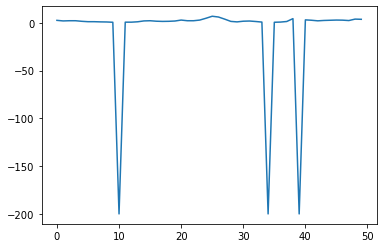

In [4]:
co = pd.Series(data['CO(GT)'])[:50]
co.plot()

In [8]:
test = data[['CO(GT)', 'NO2(GT)', 'PT08.S5(O3)']][:4096]
test

,CO(GT),NO2(GT),PT08.S5(O3)
0,2.6,113.0,1268.0
1,2.0,92.0,972.0
2,2.2,114.0,1074.0
3,2.2,122.0,1203.0
4,1.6,116.0,1110.0
...,...,...,...
4091,0.4,33.0,584.0
4092,0.5,39.0,676.0
4093,0.7,43.0,685.0
4094,1.2,62.0,894.0


In [12]:
X = test.to_numpy()
X

array([[2.600e+00, 1.130e+02, 1.268e+03],
       [2.000e+00, 9.200e+01, 9.720e+02],
       [2.200e+00, 1.140e+02, 1.074e+03],
       ...,
       [7.000e-01, 4.300e+01, 6.850e+02],
       [1.200e+00, 6.200e+01, 8.940e+02],
       [1.700e+00, 8.100e+01, 9.770e+02]])

In [14]:
np.ptp(X) == np.max(X) - np.min(X)

True

In [16]:
X_normalized = (X - np.min(X))/np.ptp(X)
X_normalized

array([[0.07573832, 0.11700935, 0.54878505],
       [0.07551402, 0.10915888, 0.43813084],
       [0.07558879, 0.11738318, 0.47626168],
       ...,
       [0.07502804, 0.09084112, 0.33084112],
       [0.07521495, 0.09794393, 0.40897196],
       [0.07540187, 0.10504673, 0.44      ]])

In [19]:
with open('air_data_crop.npy', 'wb') as f:
    np.save(f, X_normalized)
    
with open('air_data_crop.npy', 'rb') as f:
    X_ = np.load(f)

In [20]:
X_

array([[0.07573832, 0.11700935, 0.54878505],
       [0.07551402, 0.10915888, 0.43813084],
       [0.07558879, 0.11738318, 0.47626168],
       ...,
       [0.07502804, 0.09084112, 0.33084112],
       [0.07521495, 0.09794393, 0.40897196],
       [0.07540187, 0.10504673, 0.44      ]])